## Imports

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot
import matplotlib

In [2]:
dataframe = pandas.read_csv(r"C:\Users\justi\Downloads\Final Project\2. Data\Prepared\air_quality_prepared.csv")

## Charts and Graphs

In [5]:
# Create subset to be used with correlation matrix heat map
subset = dataframe[['O3 Mean', 'O3 Max', 'O3 AQI', 'CO Mean', 'CO Max', 'CO AQI', 'SO2 Mean', 'SO2 Max',
                    'SO2 AQI', 'NO2 Mean', 'NO2 Max', 'NO2 AQI']]

<AxesSubplot:>

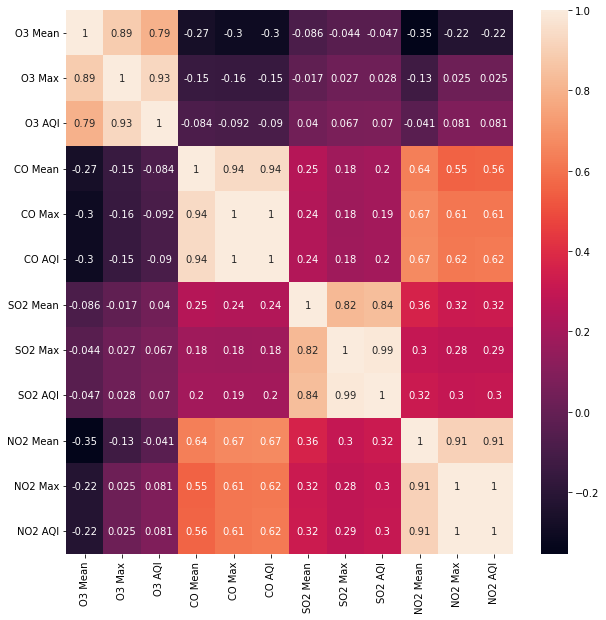

In [14]:
# Create correlation matrix heat map
pyplot.subplots(figsize=(10,10))
seaborn.heatmap(subset.corr(), annot = True)

The coefficients in the plot show that variables that are all pertaining to the same atmospheric component have a very strong positive correlation. In one case, two different atmospheric components (CO and NO2), have a strong correlation with each other. The plot does not contain any strong negative correlations. 

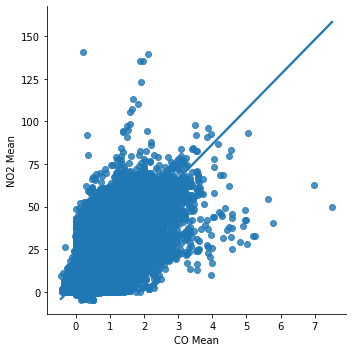

In [15]:
# Create scatterplot for CO Mean and NO2 Mean
seaborn.lmplot(data = dataframe, x = 'CO Mean', y = 'NO2 Mean')

The relationship between CO Mean and NO2 Mean appears to have multiple linear correlations. After the initial cluster of points which contains the majority of the data, the relationship branches out into three different linear directions.

In [23]:
# Create subset to be used with pairplot
subset2 = dataframe[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']]

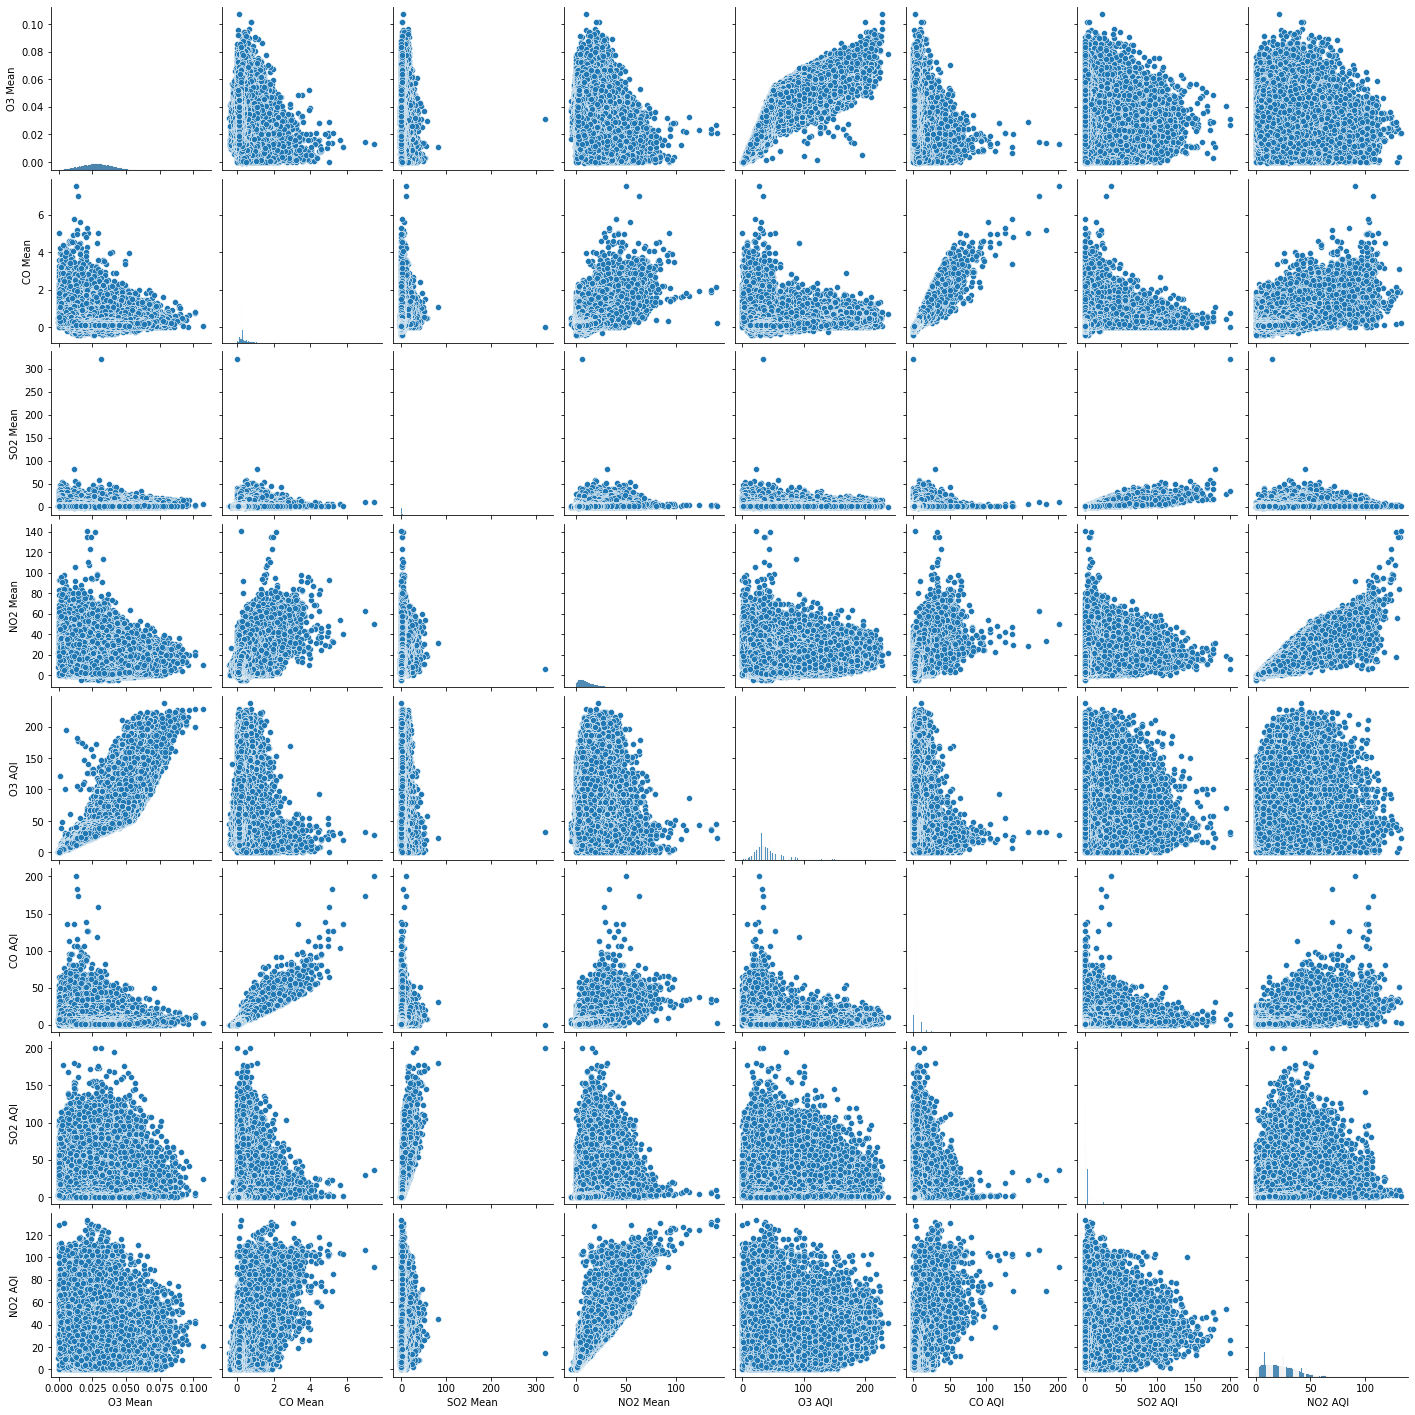

In [24]:
# Create pairplot
seaborn.pairplot(subset2)

The variable SO2 Mean should be further explored as it is showing a very high outlier.
The relationship between CO and NO2 should be further explored as these two variables have a strong positive correlation.
The relationship between O3 and NO2 could also be further explored as these two variables have a moderate negative correlation.
Variables that share the same atmospheric component (such as CO Mean and CO AQI) have a very strong correlation, but this is to be expected.

<AxesSubplot:xlabel='NO2 Mean', ylabel='Count'>

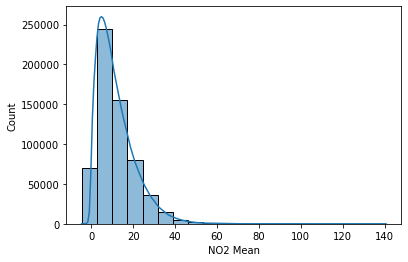

In [28]:
# Create histogram to assist with groupings for new column NO2 Level
seaborn.histplot(dataframe['NO2 Mean'], bins = 20, kde = True)

In [38]:
# Create new column NO2 Level
dataframe.loc[dataframe['NO2 Mean'] < 5, 'NO2 Level'] = 'Low'
dataframe.loc[(dataframe['NO2 Mean'] >= 5) & (dataframe['NO2 Mean'] < 25), 'NO2 Level'] = 'Moderate'
dataframe.loc[dataframe['NO2 Mean'] >= 25, 'NO2 Level'] = 'High'

([<matplotlib.axis.XTick at 0x1c10fe06130>,
 [Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100')])

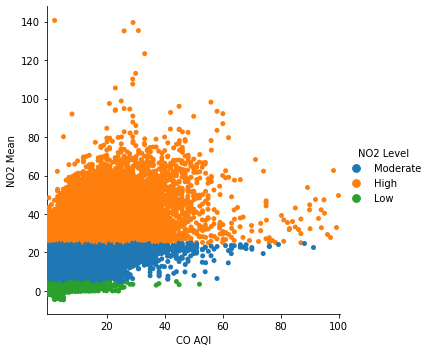

In [59]:
# Create category plot for CO AQI and NO2 Level
seaborn.catplot(data = dataframe, x = 'CO AQI', y = 'NO2 Mean', hue = 'NO2 Level')
pyplot.xticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'])

The results of this categorical plot show that there is a strong positive correlation between CO AQI and NO2 Mean.

## Next Steps

Based on the exploration conducted so far, none of my questions can be answered. All questions pertaining to correlation have either a geograhical component or time component to them, which was not addressed.
Additional question: Is the high outlier for SO2 Mean valid or invalid?

Hypothesis: If the mean values for any certain atmospheric component increase, then the AQI for that atmospheric component will increase as well. 